https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
    
https://medium.com/machine-learning-101/k-nearest-neighbors-classifier-1c1ff404d265

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#

https://www.saedsayad.com/k_nearest_neighbors.htm

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

X = dataset.drop("Class",axis="columns")
y = dataset.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

print(classifier.predict(X_test[:3]))
print(X_test[:3])

['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']
     sepal-length  sepal-width  petal-length  petal-width
107           7.3          2.9           6.3          1.8
77            6.7          3.0           5.0          1.7
89            5.5          2.5           4.0          1.3


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Comparing Error Rate with the K Value

In [20]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

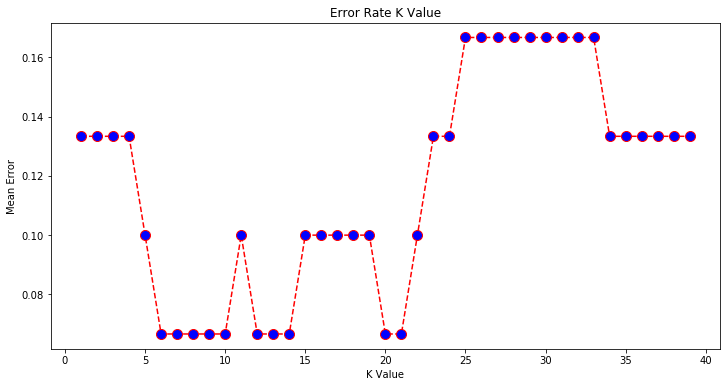

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the output we can see that the mean error is zero when the value of the K is between 5 and 18. I would advise you to play around with the value of K to see how it impacts the accuracy of the predictions.